# Data Exploration Exercises

- Do your work for this exercise in a file named explore.

# 1. Spam Data

##  a. Load the spam data set.

In [1]:
import re
import unicodedata
import pandas as pd
import nltk
from sqlalchemy import create_engine

from env import username, password, host

def get_db_url(database, host=host, user=username, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### ***View counts and frequency function to analyze the data***

In [11]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

In [13]:
show_counts_and_ratios(df, "label")

,n,percent
label,,
ham,4825,0.865937
spam,747,0.134063


### ***Clean text data with function***

In [4]:
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

### ***Adding additional stopewords to function***

In [336]:
STOPWORDS = ['r', 'us', '2', 'ltgt', 'x'] # added x for trigrams

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

### ***Create labels for text data (ham, spam)***

In [176]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text)) 

In [177]:
len(all_words), len(spam_words), len(ham_words)

(50256, 12153, 38103)

 ## **b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?**

### ***Looking at the the value counts (Frequencies)***

In [46]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [49]:
print('\n====================\nHam Frequency:\n====================')
print(ham_freq.head())
print('\n\n====================\nSpam Frequency:\n====================')
print(spam_freq.head())
print('\n\n====================\nAll Frequency:\n====================')
print(all_freq.head())


Ham Frequency:
u       1027
im       449
get      314
2        305
ltgt     276
Name: count, dtype: int64


Spam Frequency:
call    359
free    216
2       173
u       155
txt     150
Name: count, dtype: int64


All Frequency:
u       1182
call     600
2        478
im       462
get      397
Name: count, dtype: int64


### ***Put word data into a dataframe***

In [56]:
# create word count for each one and return as type integer for dataframe
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)

In [58]:
# rename the col names
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
u,1027,155,1182
im,449,13,462
get,314,83,397
2,305,173,478
ltgt,276,0,276


### ***Noticed that the index does have some words that have no meaning so it would be helpful to include additional stopwords to filter them out of our text data.***

#### ***using (ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']) per the exercise; added into clean function***

In [64]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)

word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279


### ***Now that a dataframes holds the cleaned text data we can begin to create bigrams for ham and spam!***

In [179]:
ham_bigrams = (pd.Series(nltk.bigrams(ham_words)).value_counts().head(10))
ham_bigrams

(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       32
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(ok, lor)          22
Name: count, dtype: int64

In [180]:
spam_bigrams = (pd.Series(nltk.bigrams(spam_words)).value_counts().head(10))
spam_bigrams

(please, call)         44
(customer, service)    27
(po, box)              24
(guaranteed, call)     23
(a1000, cash)          23
(prize, guaranteed)    22
(send, stop)           19
(chance, win)          19
(selected, receive)    19
(every, week)          19
Name: count, dtype: int64

### ***bigrams are set and we can begin to visualize them***

In [154]:
# added libs for visuals
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Top 10 Ham_words bigrams horizontal bar chart

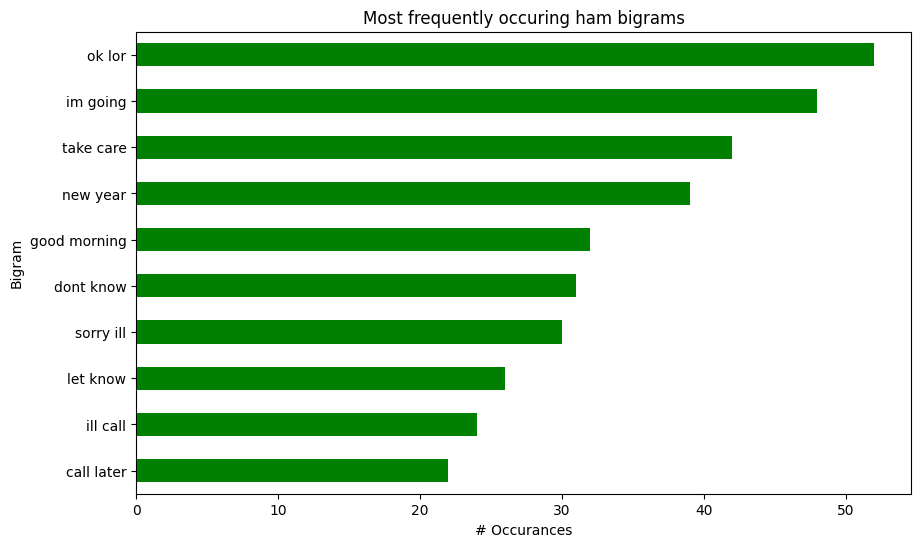

In [181]:
ham_bigrams.sort_values(ascending=True).plot.barh(color='green', width=.5, figsize=(10, 6))

plt.title('Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
plt.show()

## Top 10 Spam_words bigrams horizontal bar chart

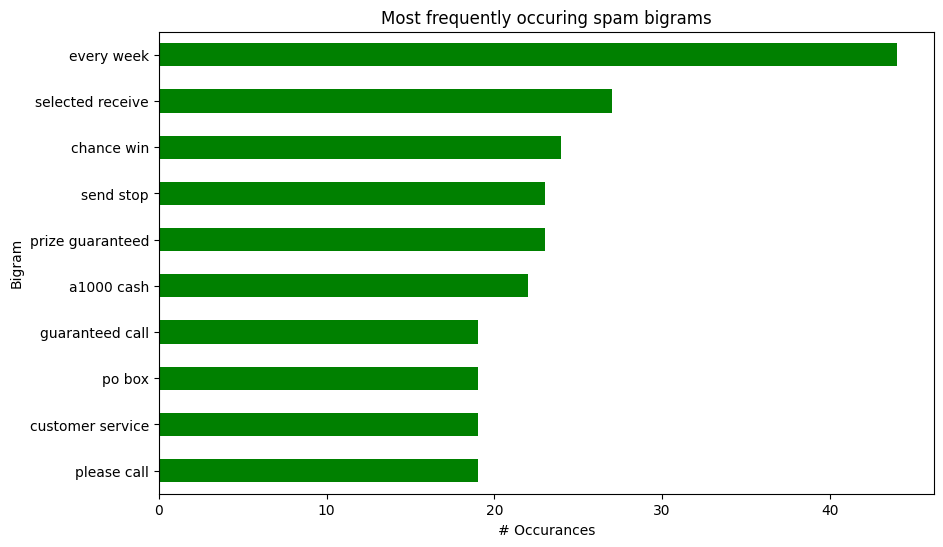

In [182]:
spam_bigrams.sort_values(ascending=True).plot.barh(color='green', width=.5, figsize=(10, 6))

plt.title('Most frequently occuring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = spam_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
plt.show()

### ***We can supply our own values to be used to determine how big the words (or phrases) should be through the `generate_from_frequencies` method.***

### ***The supplied values must be in the form of a dictionary where the keys are the words (phrases), and the values are numbers that correspond to the sizes.***

  ------

### ***We'll convert our series to a dictionary, and convert the tuples that make up the index into a single string that holds each phrase.***

## Ham bigrams wordcloud

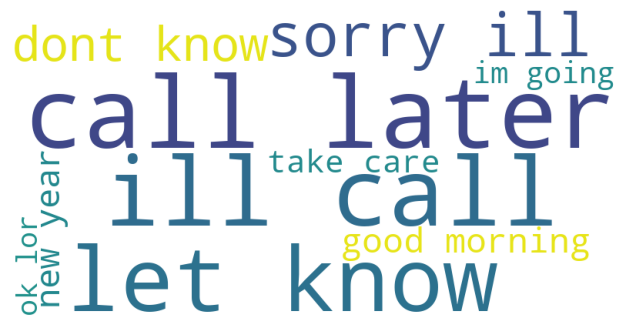

In [183]:
ham_bigrams = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(ham_bigrams)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

## Spam bigrams wordcloud

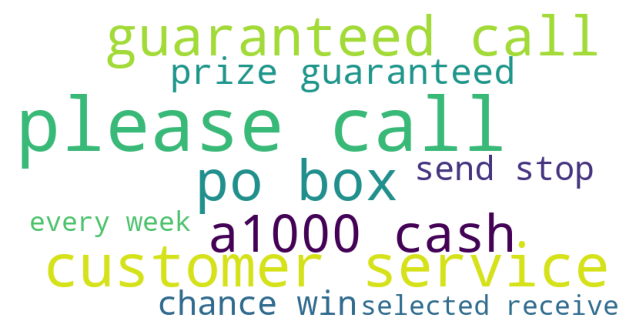

In [184]:
spam_bigrams = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(spam_bigrams)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

### ***plotted side by side wordclouds for both***

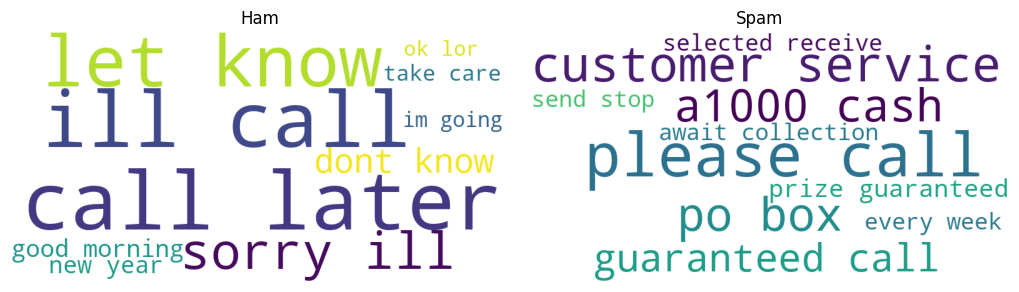

In [149]:
ham_wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(ham_bigrams)
spam_wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(spam_bigrams)

plt.figure(figsize=(10, 6))
axs = [plt.axes([0, .5, .5, .5]), plt.axes([.5, .5, .5, .5])]

axs[0].imshow(ham_wordcloud)
axs[1].imshow(spam_wordcloud)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs: ax.axis('off')
plt.show()

##  We can see that when the top ten compared from both ham words and spam words bigrams 'Call' seems to be the most frequent.

##

## c. Is there any overlap in the bigrams for the spam data and the ham data?

In [185]:
# Find overlapping bigrams
overlap_bigrams = set(ham_bigrams).intersection(spam_bigrams)

print("Overlapping Bigrams:")
print(overlap_bigrams)

Overlapping Bigrams:
set()


 ## there are no overlapping bigrams

###  d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

### ***Created trigrams for spam and ham***

In [189]:
ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3)).value_counts().head(10))
spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3)).value_counts().head(10))

print(ham_trigrams)
print(f'\n=======================================\n')
print(spam_bigrams)

(ill, call, later)       42
(sorry, ill, call)       38
(happy, new, year)       19
(pls, send, message)     13
(right, pls, send)       12
(phone, right, pls)      12
(pick, phone, right)     12
(cant, pick, phone)      12
(hi, hi, hi)             11
(good, morning, dear)     7
Name: count, dtype: int64


(prize, guaranteed, call)     21
(call, customer, service)     15
(reply, call, 08000930705)    14
(land, line, claim)           14
(2003, account, statement)    13
(private, 2003, account)      13
(show, 800, unredeemed)       12
(camcorder, reply, call)      12
(guaranteed, a1000, cash)     12
(every, week, txt)            11
Name: count, dtype: int64


### ***Plotted frequencies of spam and ham (Top 10)***

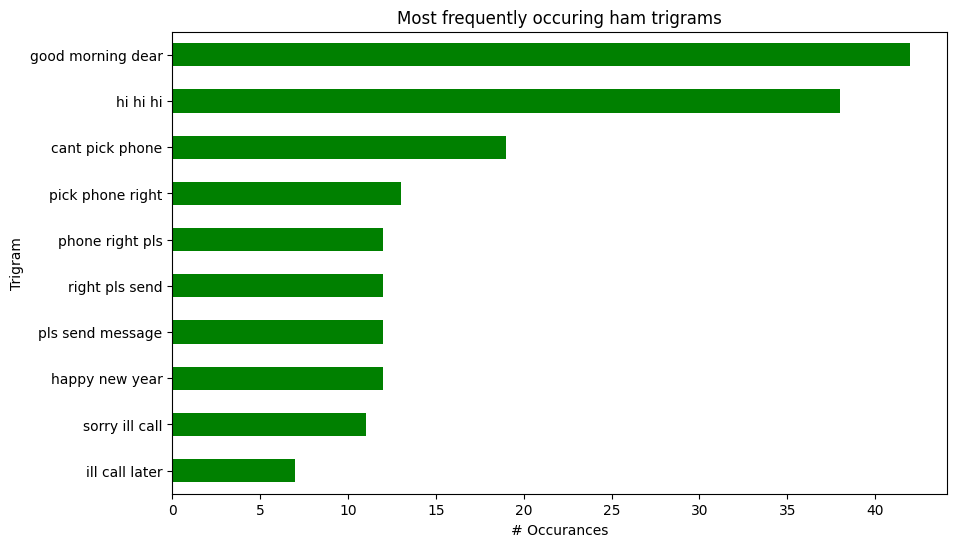

In [187]:
ham_trigrams.sort_values(ascending=True).plot.barh(color='green', width=.5, figsize=(10, 6))

plt.title('Most frequently occuring ham trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = ham_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)
plt.show()

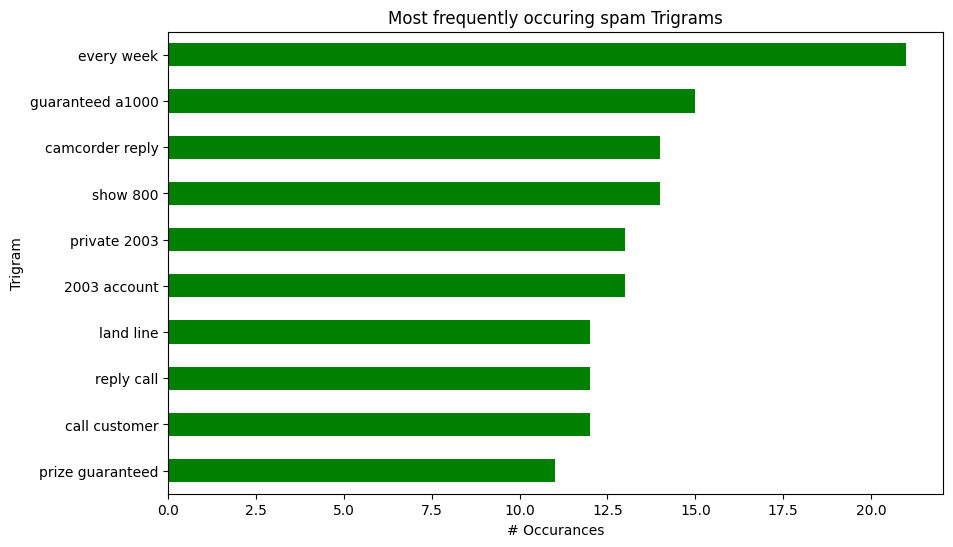

In [191]:
spam_trigrams.sort_values(ascending=True).plot.barh(color='green', width=.5, figsize=(10, 6))

plt.title('Most frequently occuring spam Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = spam_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
plt.show()

### ***wordcloud for trigrams***

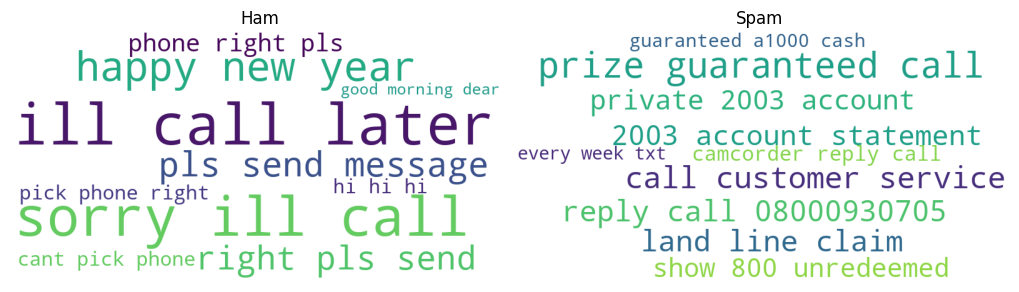

In [193]:
ham_trigrams = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ham_trigrams.to_dict().items()}
spam_trigrams = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in spam_trigrams.to_dict().items()}

ham_wc = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(ham_trigrams)
spam_wc = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(spam_trigrams)

plt.figure(figsize=(10, 6))
axs = [plt.axes([0, .5, .5, .5]), plt.axes([.5, .5, .5, .5])]

axs[0].imshow(ham_wc)
axs[1].imshow(spam_wc)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs: ax.axis('off')
plt.show()

In [195]:
# Find overlapping bigrams
overlap_trigrams = set(ham_trigrams).intersection(spam_trigrams)

print("Overlapping Trigrams:")
print(overlap_trigrams)

Overlapping Trigrams:
set()


# There were no overlapping trigrams, trigrams top ten included call at least once, however they are differenct words in the top return for the text data when turned into trigrams

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [339]:
import acquire as a
import prepare as p

In [340]:
codeup_df = a.get_blog_articles_data()
codeup_df

,title,content
0,Spotlight on APIDA Voices: Celebrating Heritag...,May is traditionally known as Asian American a...
1,Women in tech: Panelist Spotlight – Magdalena ...,Women in tech: Panelist Spotlight – Magdalena ...
2,Women in tech: Panelist Spotlight – Rachel Rob...,Women in tech: Panelist Spotlight – Rachel Rob...
3,Women in Tech: Panelist Spotlight – Sarah Mellor,Women in tech: Panelist Spotlight – Sarah Mell...
4,Women in Tech: Panelist Spotlight – Madeleine ...,Women in tech: Panelist Spotlight – Madeleine ...
5,Black Excellence in Tech: Panelist Spotlight –...,Black excellence in tech: Panelist Spotlight –...


In [341]:
#print(codeup_df['content'][0])

In [342]:
# news_df.rename(columns={'content': 'original'}, inplace=True)
codeup_df.rename(columns={'content': 'original'}, inplace=True)

In [343]:
p.prep_text_data(codeup_df, 'original', extra_words = ['ha', 'u'], exclude_words = ['no']).head()

,title,original,clean,stemmed,lemmatized
0,Spotlight on APIDA Voices: Celebrating Heritag...,May is traditionally known as Asian American a...,may traditionally known asian american pacific...,may tradit known asian american pacif island a...,may traditionally known asian american pacific...
1,Women in tech: Panelist Spotlight – Magdalena ...,Women in tech: Panelist Spotlight – Magdalena ...,women tech panelist spotlight magdalena rahn c...,women tech panelist spotlight magdalena rahn c...,woman tech panelist spotlight magdalena rahn c...
2,Women in tech: Panelist Spotlight – Rachel Rob...,Women in tech: Panelist Spotlight – Rachel Rob...,women tech panelist spotlight rachel robbinsma...,women tech panelist spotlight rachel robbinsma...,woman tech panelist spotlight rachel robbinsma...
3,Women in Tech: Panelist Spotlight – Sarah Mellor,Women in tech: Panelist Spotlight – Sarah Mell...,women tech panelist spotlight sarah mellor cod...,women tech panelist spotlight sarah mellor cod...,woman tech panelist spotlight sarah mellor cod...
4,Women in Tech: Panelist Spotlight – Madeleine ...,Women in tech: Panelist Spotlight – Madeleine ...,women tech panelist spotlight madeleine capper...,women tech panelist spotlight madelein capper ...,woman tech panelist spotlight madeleine capper...


In [344]:
codeup_df

,title,original,clean,stemmed,lemmatized
0,Spotlight on APIDA Voices: Celebrating Heritag...,May is traditionally known as Asian American a...,may traditionally known asian american pacific...,may tradit known asian american pacif island a...,may traditionally known asian american pacific...
1,Women in tech: Panelist Spotlight – Magdalena ...,Women in tech: Panelist Spotlight – Magdalena ...,women tech panelist spotlight magdalena rahn c...,women tech panelist spotlight magdalena rahn c...,woman tech panelist spotlight magdalena rahn c...
2,Women in tech: Panelist Spotlight – Rachel Rob...,Women in tech: Panelist Spotlight – Rachel Rob...,women tech panelist spotlight rachel robbinsma...,women tech panelist spotlight rachel robbinsma...,woman tech panelist spotlight rachel robbinsma...
3,Women in Tech: Panelist Spotlight – Sarah Mellor,Women in tech: Panelist Spotlight – Sarah Mell...,women tech panelist spotlight sarah mellor cod...,women tech panelist spotlight sarah mellor cod...,woman tech panelist spotlight sarah mellor cod...
4,Women in Tech: Panelist Spotlight – Madeleine ...,Women in tech: Panelist Spotlight – Madeleine ...,women tech panelist spotlight madeleine capper...,women tech panelist spotlight madelein capper ...,woman tech panelist spotlight madeleine capper...
5,Black Excellence in Tech: Panelist Spotlight –...,Black excellence in tech: Panelist Spotlight –...,black excellence tech panelist spotlight wilma...,black excel tech panelist spotlight wilmari de...,black excellence tech panelist spotlight wilma...


In [345]:
show_counts_and_ratios(codeup_df, "title")

,n,percent
title,,
Spotlight on APIDA Voices: Celebrating Heritage and Inspiring Change ft. Arbeena Thapa,1,0.166667
Women in tech: Panelist Spotlight – Magdalena Rahn,1,0.166667
Women in tech: Panelist Spotlight – Rachel Robbins-Mayhill,1,0.166667
Women in Tech: Panelist Spotlight – Sarah Mellor,1,0.166667
Women in Tech: Panelist Spotlight – Madeleine Capper,1,0.166667
Black Excellence in Tech: Panelist Spotlight – Wilmarie De La Cruz Mejia,1,0.166667


In [346]:
#

In [348]:
spotlight_words = clean(' '.join(codeup_df[codeup_df['title'].str.contains('Spotlight on APIDA Voices:')].clean))
women_words = clean(' '.join(codeup_df[codeup_df['title'].str.contains('Women in tech:')].clean))
black_words = clean(' '.join(codeup_df[codeup_df['title'].str.contains('Black Excellence in Tech:')].clean))
all_words = clean(' '.join(codeup_df.clean))

In [349]:
len(all_words), len(spotlight_words), len(women_words), len(black_words)

(1154, 445, 365, 88)

In [353]:
#spotlight_words

In [350]:
all_freq = pd.Series(all_words).value_counts()
soav_freq = pd.Series(spotlight_words).value_counts()
wit_freq = pd.Series(women_words).value_counts()
beit_freq = pd.Series(black_words).value_counts()

In [351]:

print('\n====================\n All Words Frequency:\n====================')
print(all_freq.head())
print('\n====================\n Spotlight on APIDA Voices Frequency:\n====================')
print(soav_freq.head())
print('\n\n====================\nWomen in tech Frequency:\n====================')
print(wit_freq.head())
print('\n\n====================\nBlack Excellence in Tech Frequency:\n====================')
print(beit_freq.head())


 All Words Frequency:
codeup     24
woman      18
data       17
tech       15
science    14
Name: count, dtype: int64

 Spotlight on APIDA Voices Frequency:
asian        12
apida         9
arbeena       6
community     6
american      6
Name: count, dtype: int64


Women in tech Frequency:
science    12
data       11
rachel     11
codeup     10
woman       8
Name: count, dtype: int64


Black Excellence in Tech Frequency:
wilmarie    6
black       4
codeup      4
tech        3
panelist    3
Name: count, dtype: int64


In [369]:
word_counts = (pd.concat([all_freq, soav_freq, wit_freq, beit_freq], axis=1, sort=True)
                .set_axis(['all', 'soav', 'wit', 'beit'], axis=1)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,soav,wit,beit
1988,1,1,0,0
2019,1,0,0,0
2022,2,0,2,0
2023,7,0,4,1
22,1,0,0,1


In [374]:
word_counts.sort_values(by='all', ascending=False)

,all,soav,wit,beit
codeup,24,1,10,4
woman,18,2,8,0
data,17,0,11,0
tech,15,0,6,3
science,14,0,12,0
...,...,...,...,...
future,1,0,1,0
fullstack,1,0,0,1
friend,1,1,0,0
french,1,0,1,0


In [398]:
# Concatenate and sorted separately for soav, wit, and beit
result = pd.concat([
    word_counts[word_counts.soav == 0].sort_values(by='soav').tail(6),
    word_counts[word_counts.wit == 0].sort_values(by='wit').tail(6),
    word_counts[word_counts.beit == 0].sort_values(by='beit').tail(6)
])

# sorted the concatenated result based on soav column
result = result.sort_values(by='soav')
result

,all,soav,wit,beit
educationfocused,1,0,0,0
education,3,0,1,0
educating,1,0,1,0
early,1,0,0,0
forest,1,0,0,0
year,3,0,0,0
event,1,1,0,0
ever,1,1,0,0
examine,1,1,0,0
example,1,1,0,0


# Visualizations

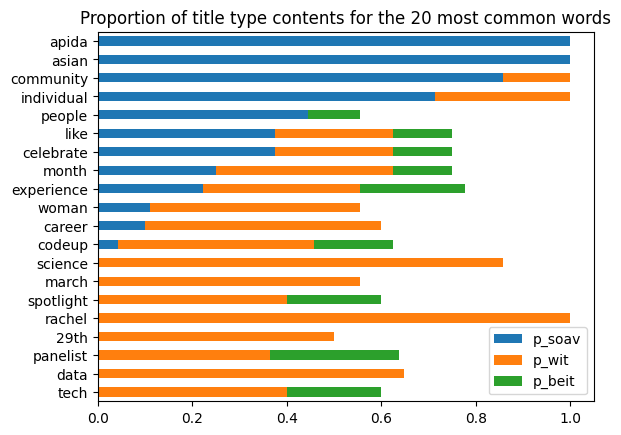

In [399]:
# figure out the percentage of spam vs ham
(word_counts.assign(p_soav=word_counts.soav / word_counts['all'],
         p_wit=word_counts.wit / word_counts['all'],
         p_beit=word_counts.beit / word_counts['all'])
.sort_values(by='all')
 [['p_soav', 'p_wit', 'p_beit']]
 .tail(20)
 .sort_values('p_soav')
 .plot.barh(stacked=True))

plt.title('Proportion of title type contents for the 20 most common words')
plt.show()

In [406]:
word_counts.sort_values('all', ascending=False).head(20)\
.apply(lambda row: row/row['all'], axis=1)

,all,soav,wit,beit
codeup,1.0,0.041667,0.416667,0.166667
woman,1.0,0.111111,0.444444,0.000000
data,1.0,0.000000,0.647059,0.000000
tech,1.0,0.000000,0.400000,0.200000
science,1.0,0.000000,0.857143,0.000000
asian,1.0,1.000000,0.000000,0.000000
rachel,1.0,0.000000,1.000000,0.000000
panelist,1.0,0.000000,0.363636,0.272727
spotlight,1.0,0.000000,0.400000,0.200000
career,1.0,0.100000,0.500000,0.000000


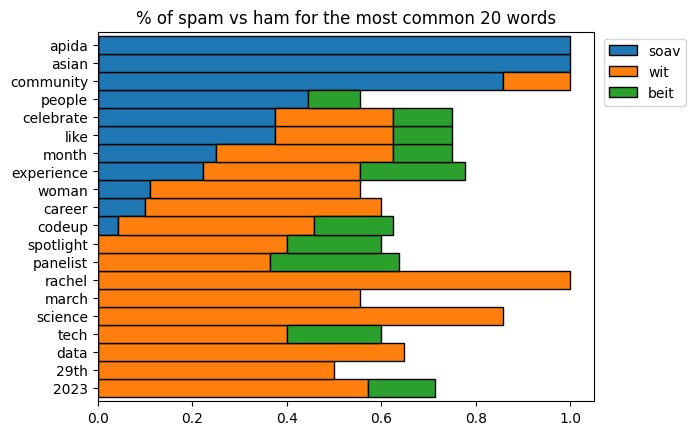

In [408]:
(word_counts.sort_values('all', ascending=False)
.head(20)
.apply(lambda row: row/row['all'], axis=1)
.drop(columns='all')
.sort_values(by='soav')
.plot.barh(stacked=True, width=1, ec='black')
)


plt.title('% of spam vs ham for the most common 20 words')
plt.legend(bbox_to_anchor=(1.2, 1.0),loc='upper right')
plt.show()

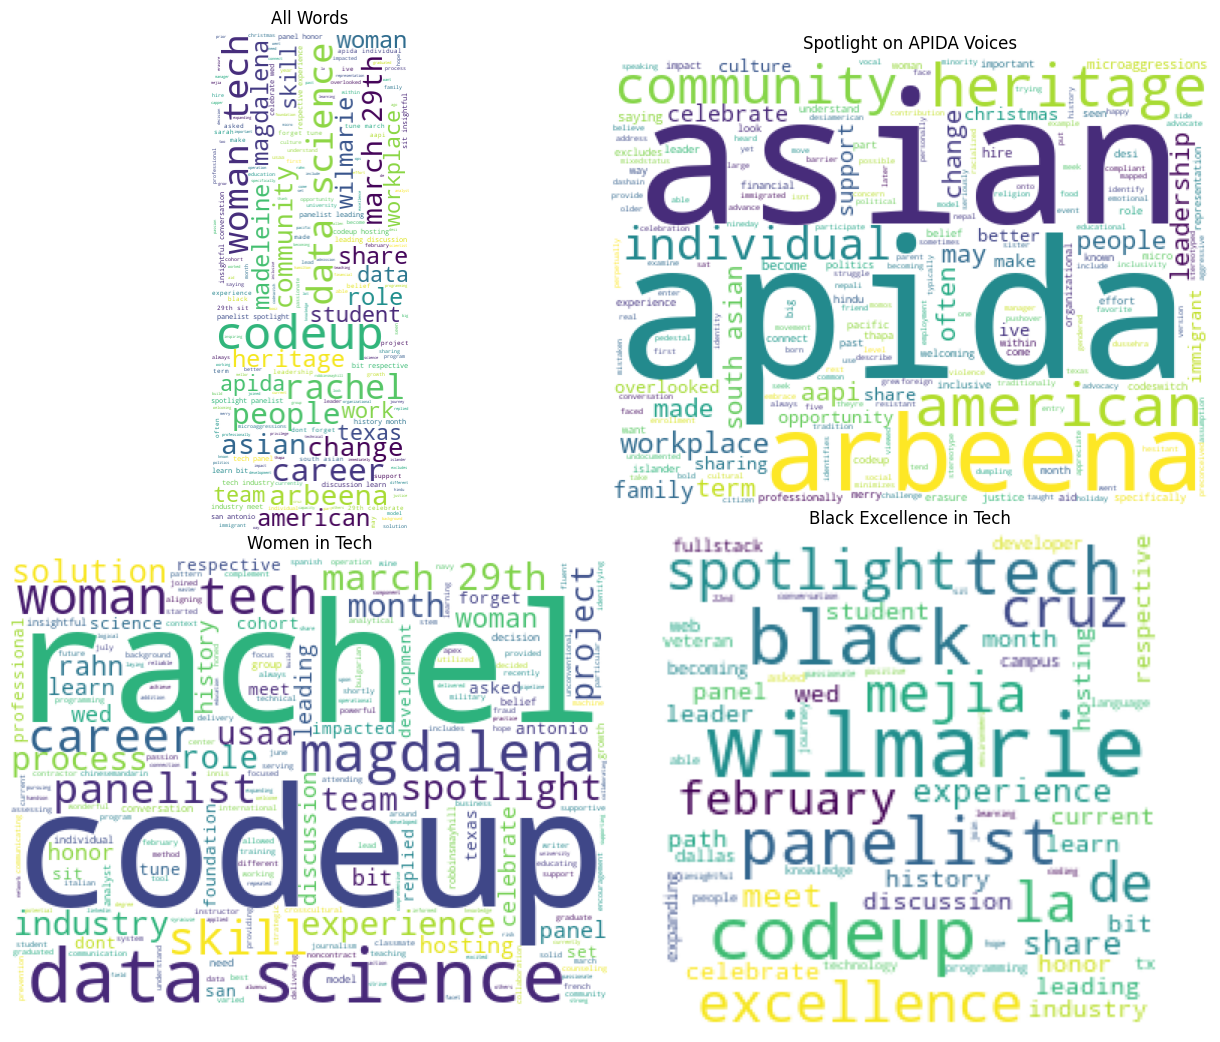

In [416]:
all_cloud = WordCloud(background_color='white', height=500, width=200).generate(' '.join(all_words))
soav_cloud = WordCloud(background_color='white', height=300, width=400).generate(' '.join(spotlight_words))
wit_cloud = WordCloud(background_color='white', height=300, width=400).generate(' '.join(women_words))
beit_cloud = WordCloud(background_color='white', height=200, width=200).generate(' '.join(black_words))

plt.figure(figsize=(12, 10))  # Increased the figure size

# Define the positions and sizes of the subplots
axs = [plt.axes([0, 0.5, 0.5, 0.5]),  # All Words
       plt.axes([0.5, 0.5, 0.5, 0.5]),  # Spotlight on APIDA Voices
       plt.axes([0, 0, 0.5, 0.5]),      # Women in Tech
       plt.axes([0.5, 0, 0.5, 0.5])]     # Black Excellence in Tech

# Display word clouds in the subplots
axs[0].imshow(all_cloud)
axs[1].imshow(soav_cloud)
axs[2].imshow(wit_cloud)
axs[3].imshow(beit_cloud)  # Added beit_cloud

# Set titles for each subplot
axs[0].set_title('All Words')
axs[1].set_title('Spotlight on APIDA Voices')
axs[2].set_title('Women in Tech')
axs[3].set_title('Black Excellence in Tech')

# Turn off axes for all subplots
for ax in axs:
    ax.axis('off')

plt.show()

# Bigrams

In [422]:
all_bigrams = (pd.Series(nltk.ngrams(all_words, 2)).value_counts().head(10))
soav_bigrams = (pd.Series(nltk.ngrams(spotlight_words, 2)).value_counts().head(10))
wit_bigrams = (pd.Series(nltk.ngrams(women_words, 2)).value_counts().head(10))
beit_bigrams = (pd.Series(nltk.ngrams(black_words, 2)).value_counts().head(10))


print(all_bigrams)
print(f'\n=======================================\n')
print(soav_bigrams)
print(f'\n=======================================\n')
print(wit_bigrams)
print(f'\n=======================================\n')
print(beit_bigrams)

(woman, tech)            12
(data, science)          12
(march, 29th)             8
(learn, bit)              5
(2023, celebrate)         5
(codeup, hosting)         5
(panel, honor)            5
(panelist, spotlight)     5
(tech, panelist)          5
(discussion, learn)       5
Name: count, dtype: int64


(apida, individual)         4
(south, asian)              4
(asian, american)           3
(professionally, often)     2
(overlooked, leadership)    2
(within, apida)             2
(arbeena, thapa)            2
(immigrant, justice)        2
(financial, aid)            2
(merry, christmas)          2
Name: count, dtype: int64


(data, science)             10
(woman, tech)                6
(march, 29th)                4
(learn, bit)                 2
(respective, experience)     2
(experience, woman)          2
(tech, industry)             2
(industry, meet)             2
(san, antonio)               2
(antonio, texas)             2
Name: count, dtype: int64


(black, excellence)       

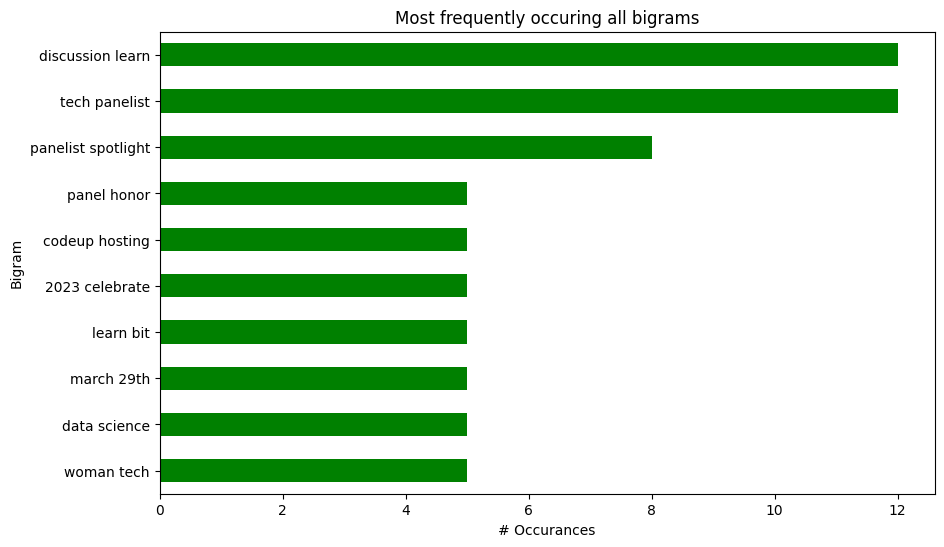

In [427]:
all_bigrams.sort_values(ascending=True).plot.barh(color='green', width=.5, figsize=(10, 6))

plt.title('Most frequently occuring all bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = all_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
plt.show()

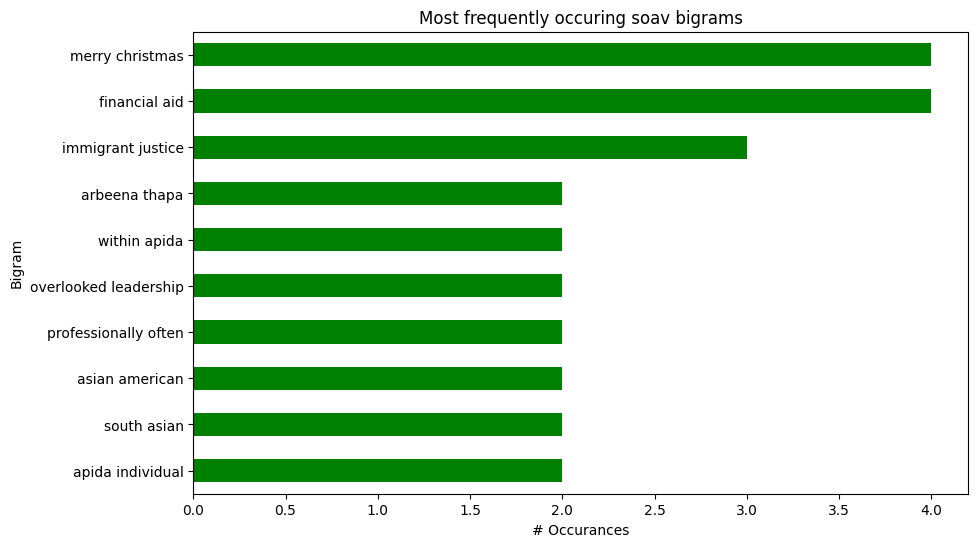

In [428]:
soav_bigrams.sort_values(ascending=True).plot.barh(color='green', width=.5, figsize=(10, 6))

plt.title('Most frequently occuring soav bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = soav_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
plt.show()

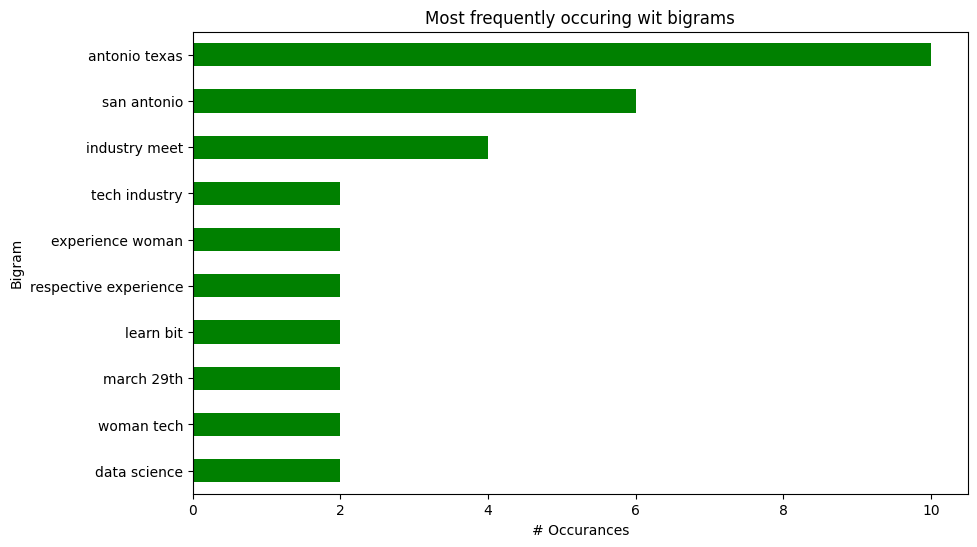

In [429]:
wit_bigrams.sort_values(ascending=True).plot.barh(color='green', width=.5, figsize=(10, 6))

plt.title('Most frequently occuring wit bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = wit_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
plt.show()

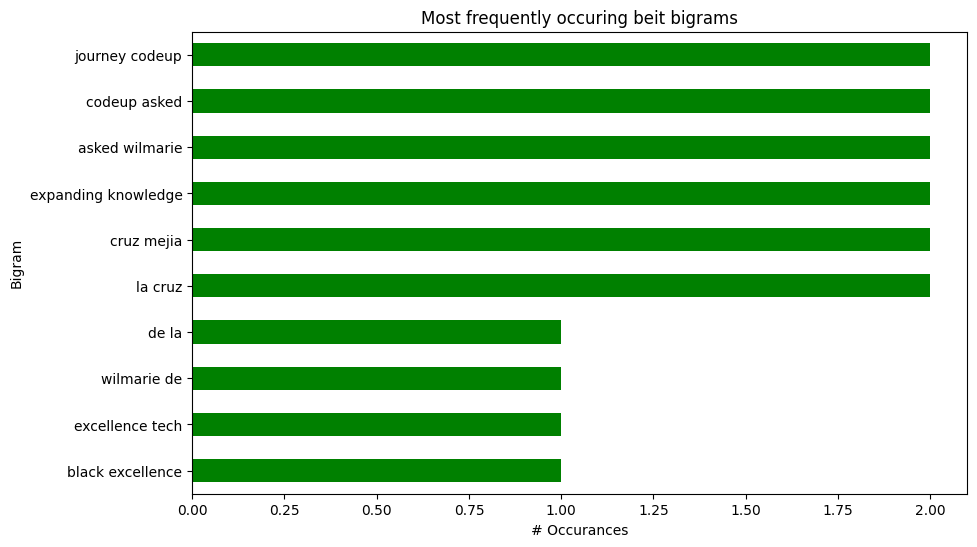

In [430]:
beit_bigrams.sort_values(ascending=True).plot.barh(color='green', width=.5, figsize=(10, 6))

plt.title('Most frequently occuring beit bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = beit_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
plt.show()

In [ ]:
all_cloud = WordCloud(background_color='white', height=500, width=200).generate(' '.join(all_words))
soav_cloud = WordCloud(background_color='white', height=300, width=400).generate(' '.join(spotlight_words))
wit_cloud = WordCloud(background_color='white', height=300, width=400).generate(' '.join(women_words))
beit_cloud = WordCloud(background_color='white', height=200, width=200).generate(' '.join(black_words))

plt.figure(figsize=(12, 10))  # Increased the figure size

# Define the positions and sizes of the subplots
axs = [plt.axes([0, 0.5, 0.5, 0.5]),  # All Words
       plt.axes([0.5, 0.5, 0.5, 0.5]),  # Spotlight on APIDA Voices
       plt.axes([0, 0, 0.5, 0.5]),      # Women in Tech
       plt.axes([0.5, 0, 0.5, 0.5])]     # Black Excellence in Tech

# Display word clouds in the subplots
axs[0].imshow(all_cloud)
axs[1].imshow(soav_cloud)
axs[2].imshow(wit_cloud)
axs[3].imshow(beit_cloud)  # Added beit_cloud

# Set titles for each subplot
axs[0].set_title('All Words')
axs[1].set_title('Spotlight on APIDA Voices')
axs[2].set_title('Women in Tech')
axs[3].set_title('Black Excellence in Tech')

# Turn off axes for all subplots
for ax in axs:
    ax.axis('off')

plt.show()

# Trigrams

In [434]:
all_trigrams = (pd.Series(nltk.ngrams(all_words, 3)).value_counts().head(10))
soav_trigrams = (pd.Series(nltk.ngrams(spotlight_words, 3)).value_counts().head(10))
wit_trigrams = (pd.Series(nltk.ngrams(women_words, 3)).value_counts().head(10))
beit_trigrams = (pd.Series(nltk.ngrams(black_words, 3)).value_counts().head(10))


print(all_trigrams)
print(f'\n=======================================\n')
print(soav_trigrams)
print(f'\n=======================================\n')
print(wit_trigrams)
print(f'\n=======================================\n')
print(beit_trigrams)

(celebrate, wed, like)             5
(panelist, leading, discussion)    5
(sit, insightful, conversation)    5
(leading, discussion, learn)       5
(tech, panel, honor)               5
(2023, celebrate, wed)             5
(wed, like, spotlight)             5
(like, spotlight, panelist)        5
(spotlight, panelist, leading)     5
(tech, panelist, spotlight)        5
Name: count, dtype: int64


(saying, merry, christmas)     2
(may, traditionally, known)    1
(may, share, belief)           1
(role, leader, may)            1
(leadership, role, leader)     1
(like, leadership, role)       1
(look, like, leadership)       1
(someone, look, like)          1
(important, someone, look)     1
(say, important, someone)      1
Name: count, dtype: int64


(woman, tech, panelist)            2
(spotlight, panelist, leading)     2
(leading, discussion, learn)       2
(discussion, learn, bit)           2
(learn, bit, respective)           2
(bit, respective, experience)      2
(respective, experienc

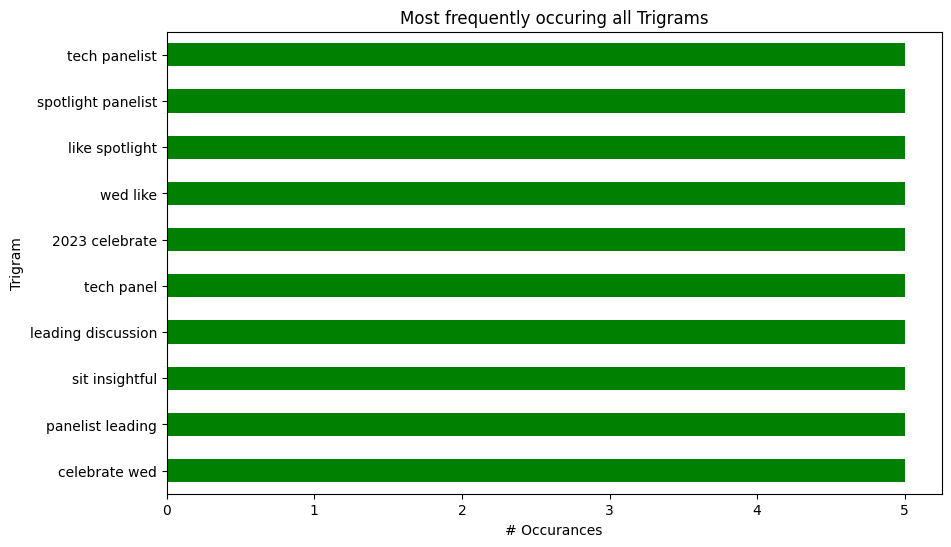

In [435]:
all_trigrams.sort_values(ascending=True).plot.barh(color='green', width=.5, figsize=(10, 6))

plt.title('Most frequently occuring all Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = all_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
plt.show()

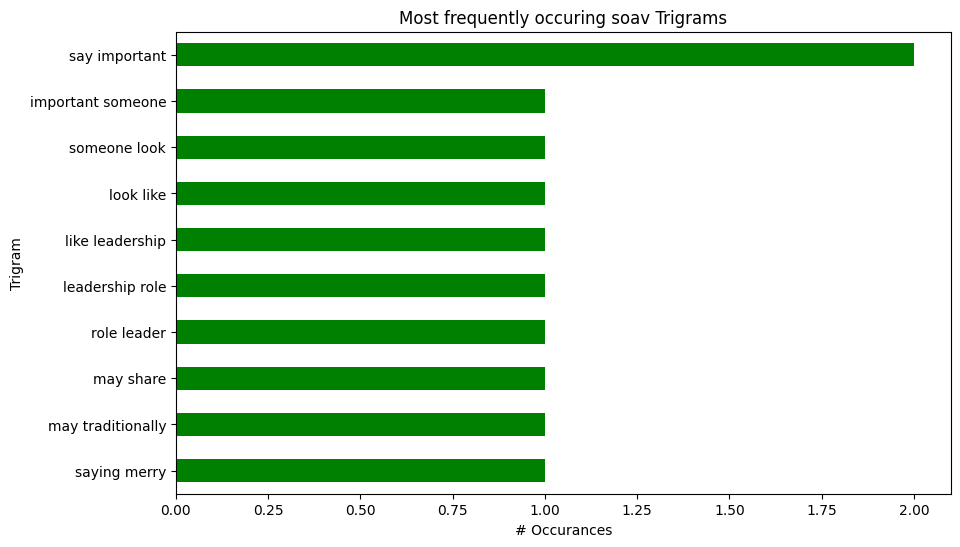

In [436]:
soav_trigrams.sort_values(ascending=True).plot.barh(color='green', width=.5, figsize=(10, 6))

plt.title('Most frequently occuring soav Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = soav_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
plt.show()

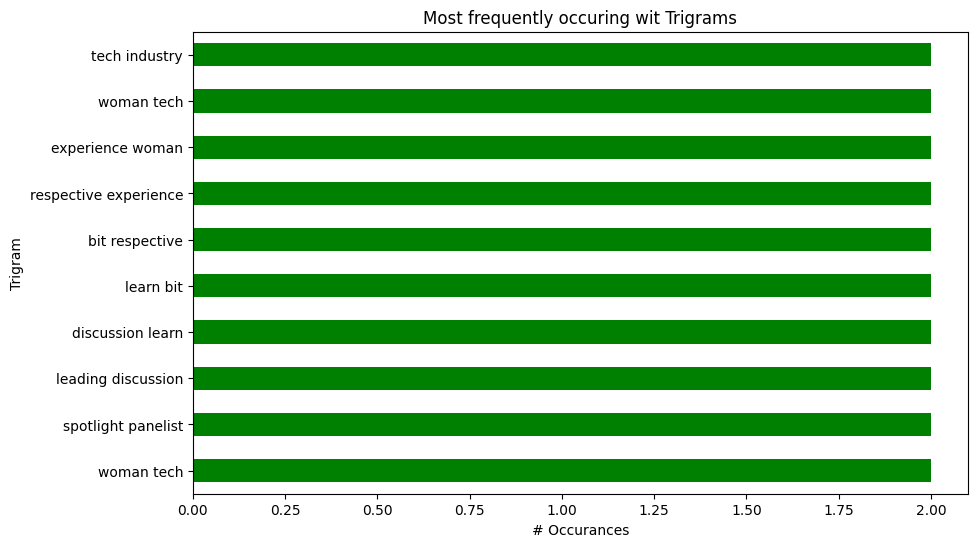

In [438]:
wit_trigrams.sort_values(ascending=True).plot.barh(color='green', width=.5, figsize=(10, 6))

plt.title('Most frequently occuring wit Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = wit_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
plt.show()

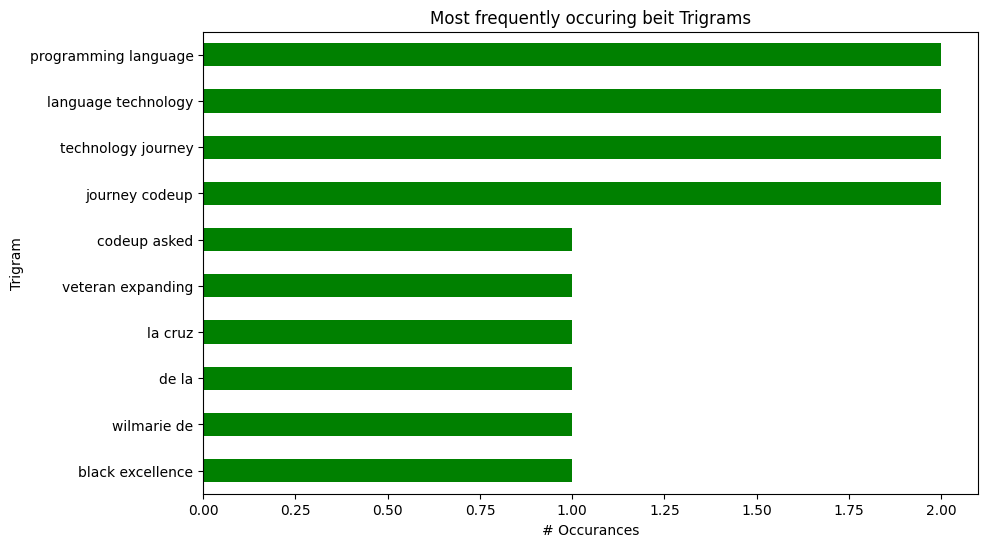

In [440]:
beit_trigrams.sort_values(ascending=True).plot.barh(color='green', width=.5, figsize=(10, 6))

plt.title('Most frequently occuring beit Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = beit_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
plt.show()

In [448]:
soav_trigrams = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in soav_trigrams.to_dict().items()}
wit_trigrams = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in wit_trigrams.to_dict().items()}
beit_trigrams = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in beit_trigrams.to_dict().items()}

soav_wc = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(soav_trigrams)
wit_wc = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(wit_trigrams)
beit_wc = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(beit_trigrams)


plt.figure(figsize=(10, 6))

axs = [plt.axes([0, 0.5, 0.5, 0.5]),
       plt.axes([0.5, 0.5, 0.5, 0.5]),
       plt.axes([0, 0, 0.5, 0.5])]


axs[0].imshow(soav_wc)
axs[1].imshow(wit_wc)
axs[2].imshow(beit_wc)


axs[0].set_title('Spotlight on APIDA Voices')
axs[1].set_title('Women in Tech')
axs[2].set_title('Black Excellence in Tech')


for ax in axs: ax.axis('off')
plt.show()

AttributeError: 'dict' object has no attribute 'to_dict'

#### 

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the `category` variable when exploring.